## Prepare the data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [2]:
# need to replace empty values in the data
data.replace('?', np.nan, inplace=True)
# need to correct the data type now that the empties have been removed
data = data.astype({"age": np.float64, "fare": np.float64})
# data.dtypes # show data types for each column

<AxesSubplot:xlabel='survived', ylabel='fare'>

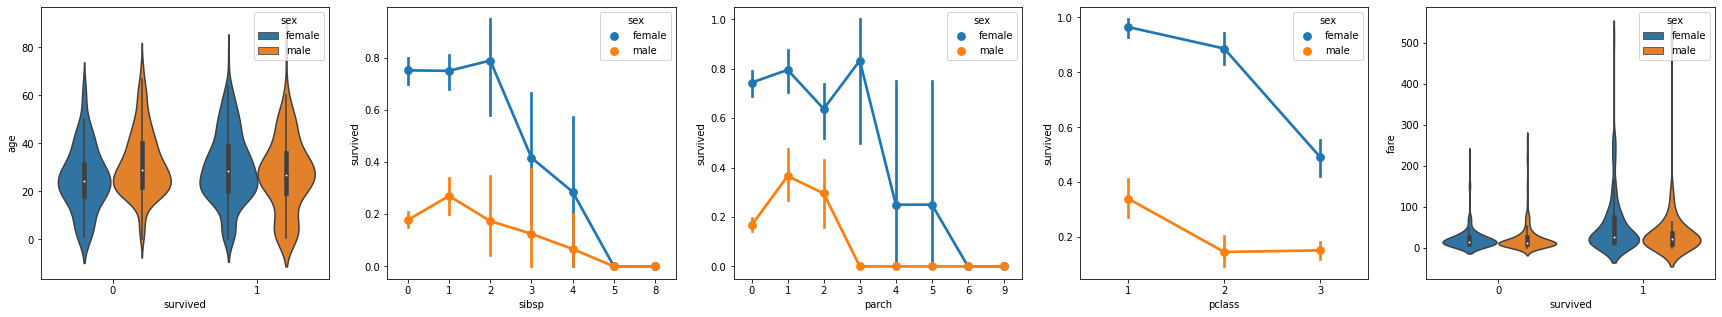

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
# convert gender from string to number
data.replace({'male': 1, 'female': 0}, inplace=True)

In [5]:
# find correlations between all variables and survival. 
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [6]:
# combine sibsp and parch to create a combined variable called relatives and see if the importance changes
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:
# having a relative is more important than how many of each type so we will use relatives instead. Dropping sibsp and parch cols. Drop NaN rows
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


## Train the Model

In [8]:
# split data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size = 0.2, random_state = 0)

In [9]:
# scale all input values with normalization for improved performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [10]:
# create and train the model for Naive Bayes classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()